In [87]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.special import factorial
import scipy.optimize as opt
import math
# import csv
from matplotlib import rc, rcParams

16
26
20
39
23
28


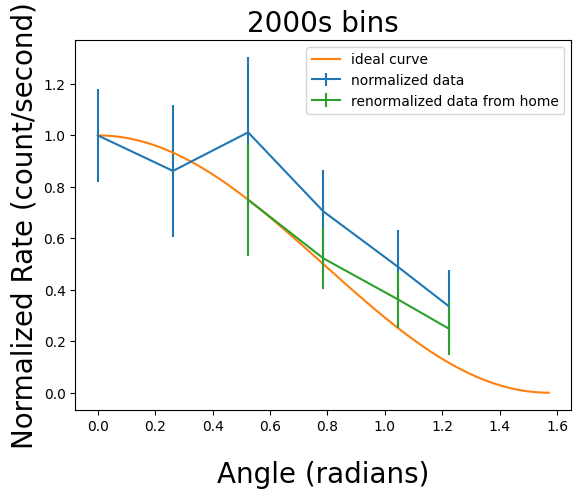

[0.73410861 0.28988549]
[[ 0.00843747 -0.00392069]
 [-0.00392069  0.00275683]]
[0.73410861 0.28988549]
[[ 0.00843747 -0.00392069]
 [-0.00392069  0.00275683]]


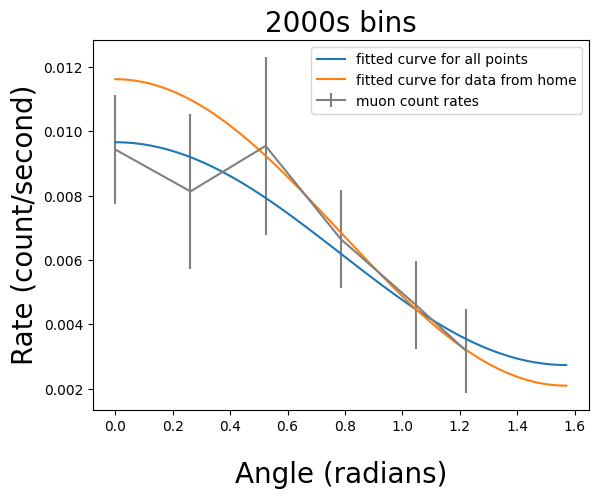

In [103]:
files = [(0, 22), (15, 21), (30, 20), (60, 17), (45, 16), (70, 24)]
all_data = []

for degree, filenum in files:
    rawdata = []
    with open(f'cw_charon/FileC0{filenum}.txt', mode ='r') as file: # "ElsieWiddowsonFileC051.txt"
        line = file.readline()
        while line[0] == "#":
            line = file.readline()

        deadtime = 0
        while line:
            line = line.split()
            time = int(line[3]) / 1000
            deadtime += (int(line[-3]) / 1000) / 1000
            if int(line[-2]) == 1:
                rawdata += [time - deadtime]
                # rawdata += [time - deadtime]
                # print(line)
            line = file.readline()

        # print(deadtime)
        # print(rawdata[-1] + deadtime)

        interval = 2000
        numbins = int(rawdata[-1] / interval) + 1
        print(numbins)
        bincounts = []
        binind = 0
        dataind = 0
        while binind < numbins:
            count = 0
            while dataind < len(rawdata) and rawdata[dataind] < (binind + 1) * interval:
                count += 1 
                dataind += 1

            bincounts += [count]
            binind += 1

        # plt.bar(np.arange(1, numbins+1), bincounts)
        # plt.title(f'{degree} degrees', fontsize=20)
        # plt.xlabel(r'Bin', fontsize=20, labelpad=20)
        # plt.ylabel(r'Count', fontsize=20)
        # plt.legend(loc="upper right",fontsize=10,ncol = 1)
        # plt.show()

        # plt.hist(bincounts)
        # plt.title(f'{degree} degrees', fontsize=20)
        # plt.xlabel(r'Count', fontsize=20, labelpad=20)
        # plt.ylabel(r'Number of bins', fontsize=20)
        # plt.legend(loc="upper right",fontsize=10,ncol = 1)
        # plt.show()

    # print(len(rawdata))
    # print(len(bincounts))
    # print(f"rate: {sum(bincounts) / (numbins * interval)}")
    # print(rawdata[-1])
    avgcount = sum(bincounts) / (numbins)
    bincounts = np.array(bincounts)
    # print(rate, rates)
    yerr = np.sqrt(np.sum((bincounts - avgcount) ** 2) / len(bincounts))

    all_data += [[degree, avgcount / interval, yerr / interval]]

all_data.sort(key=lambda a: a[0])
all_data = np.array(all_data)
all_data[:,1:] = all_data[:,1:]
all_data[:,0] = all_data[:,0] * np.pi/180

plt.errorbar(all_data[:,0], all_data[:,1] / all_data[0,1], all_data[:,2] / all_data[0,1], label="normalized data")
xrange = np.linspace(0, np.pi / 2, 100)
plt.plot(xrange, np.cos(xrange) ** 2, label="ideal curve")


plt.errorbar(all_data[2:,0], all_data[2:,1] / all_data[2,1] * np.cos(all_data[2,0]) ** 2, all_data[2:,2] / all_data[2,1] * np.cos(all_data[2,0]) ** 2,
             label="renormalized data from home")

plt.title(f'{interval}s bins', fontsize=20)
plt.xlabel(r'Angle (radians)', fontsize=20, labelpad=20)
plt.ylabel(r'Normalized Rate (count/second)', fontsize=20)
plt.legend(loc="upper right",fontsize=10,ncol = 1)
plt.show()

def rate_fit(theta, m, c):
    return (np.cos(theta) ** 2) * m + c
rate_opt, rate_cov = opt.curve_fit(rate_fit, all_data[:,0], all_data[:,1] / all_data[0,1], p0=(0.01, 1), sigma=all_data[:,2] / all_data[0,1])
print(rate_opt)
print(rate_cov)
plt.errorbar(all_data[:,0], all_data[:,1], all_data[:,2], label="muon count rates", color="gray")
xrange = np.linspace(0, np.pi / 2, 100)
plt.plot(xrange, (rate_opt[0] * np.cos(xrange)**2 + rate_opt[1]) * all_data[0,1], label="fitted curve for all points")
partial_rate_opt, partial_rate_cov = opt.curve_fit(rate_fit, all_data[2:,0], all_data[2:,1] / all_data[0,1], p0=(0.01, 1), sigma=all_data[2:,2] / all_data[0,1])
print(rate_opt)
print(rate_cov)
# plt.errorbar(all_data[2:,0], all_data[2:,1] / all_data[0,1], all_data[2:,2] / all_data[0,1], label="normalized data")
xrange = np.linspace(0, np.pi / 2, 100)
plt.plot(xrange, (partial_rate_opt[0] * np.cos(xrange)**2 + partial_rate_opt[1]) * all_data[0,1], label="fitted curve for data from home")
plt.title(f'{interval}s bins', fontsize=20)
plt.xlabel(r'Angle (radians)', fontsize=20, labelpad=20)
plt.ylabel(r'Rate (count/second)', fontsize=20)
plt.legend(loc="upper right",fontsize=10,ncol = 1)
plt.show()


32


/var/folders/62/x3ck94bx3vd6dfbs23ltb9dw0000gn/T/ipykernel_19595/2855808776.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper right",fontsize=10,ncol = 1)


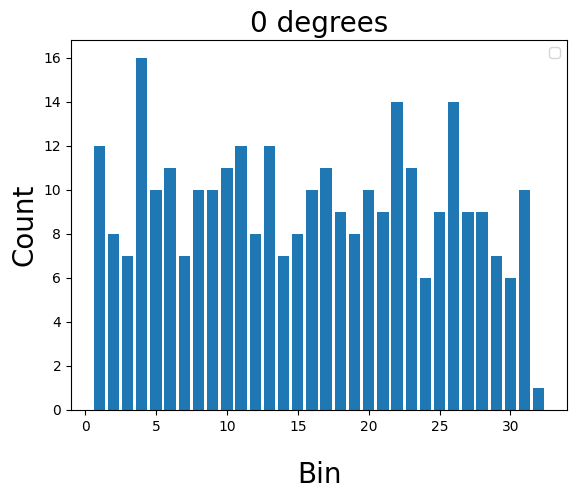

/var/folders/62/x3ck94bx3vd6dfbs23ltb9dw0000gn/T/ipykernel_19595/2855808776.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper right",fontsize=10,ncol = 1)


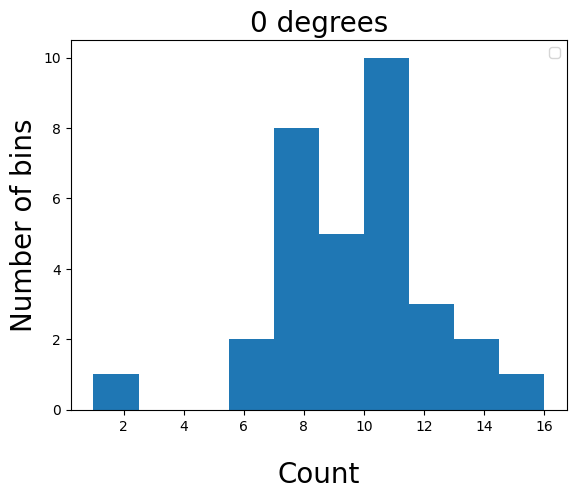

52


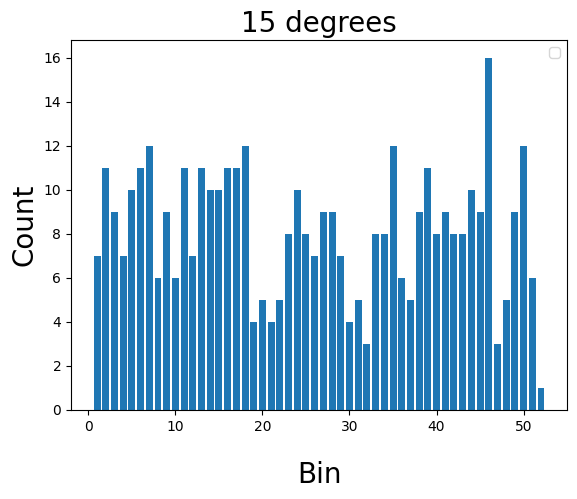

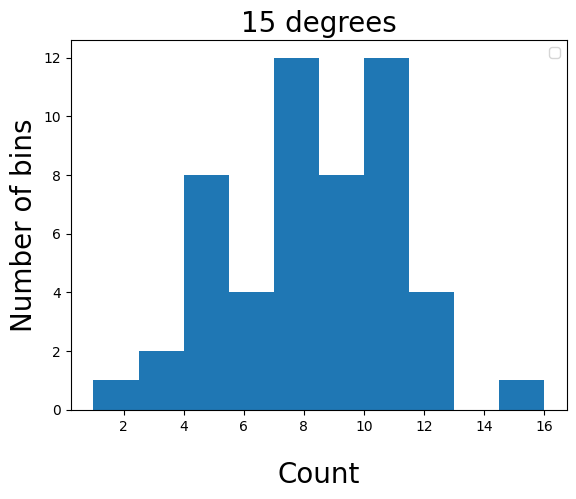

40


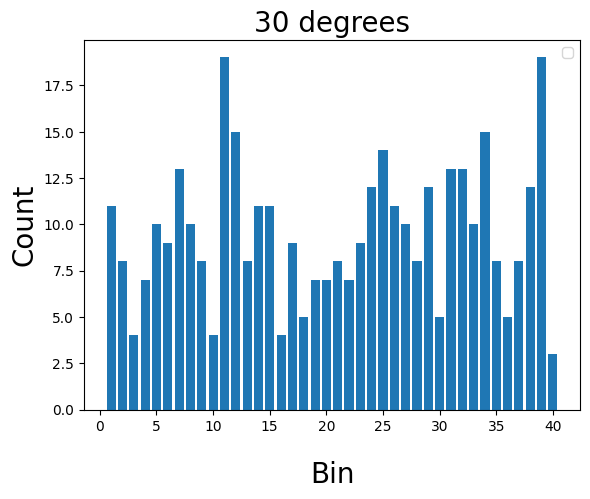

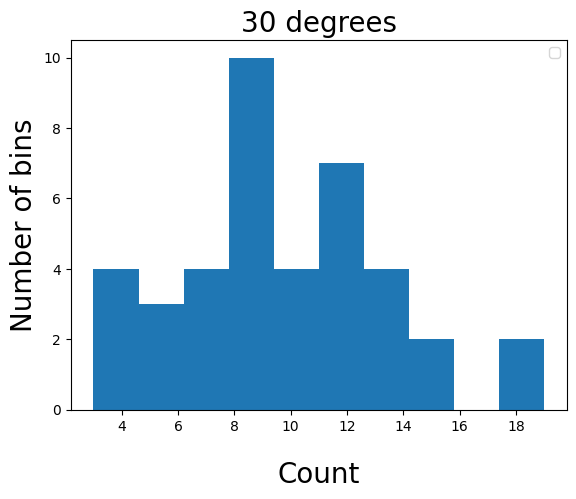

78


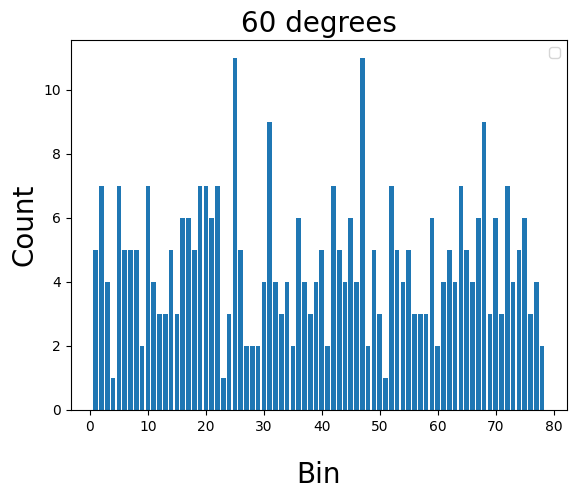

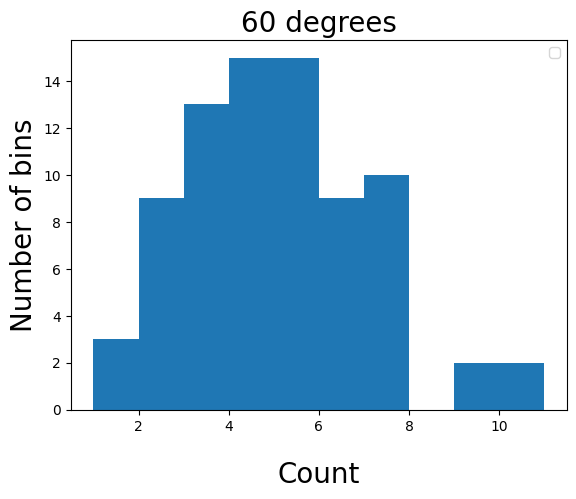

46


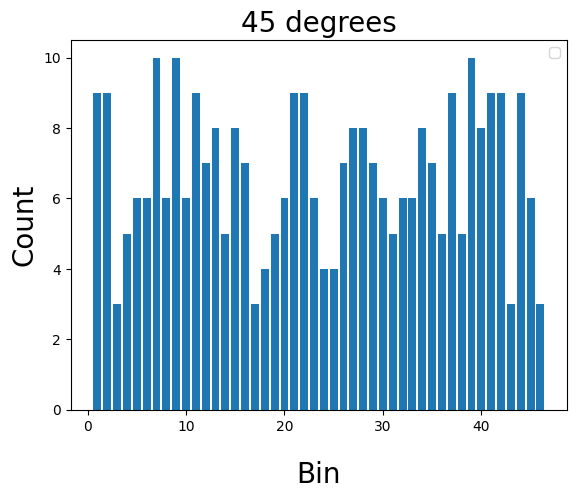

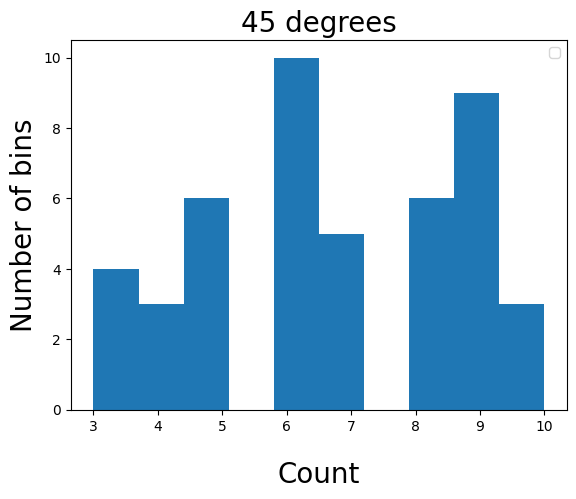

56


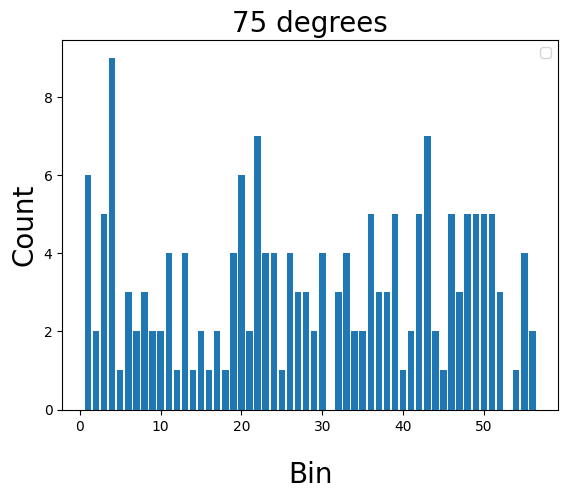

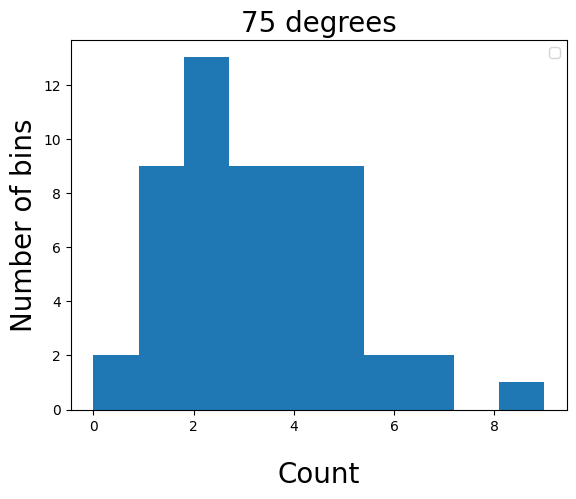

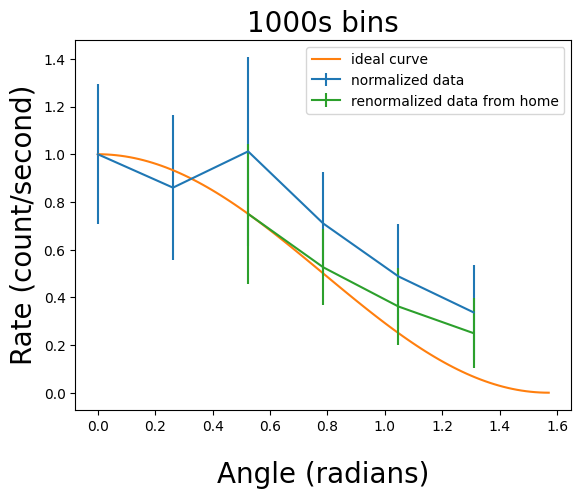

In [79]:
files = [(0, 61), (15, 60), (30, 59), (60, 56), (45, 55), (75, 63)]
all_data = []

for degree, filenum in files:
    rawdata = []
    with open(f'cw_mary/FileC0{filenum}.txt', mode ='r') as file: # "ElsieWiddowsonFileC051.txt"
        line = file.readline()
        while line[0] == "#":
            line = file.readline()

        deadtime = 0
        while line:
            line = line.split()
            time = int(line[3]) / 1000
            deadtime += (int(line[-3]) / 1000) / 1000
            if int(line[-2]) == 1:
                rawdata += [time - deadtime]
                # rawdata += [time - deadtime]
                # print(line)
            line = file.readline()

        # print(deadtime)
        # print(rawdata[-1] + deadtime)

        interval = 1000
        numbins = int(rawdata[-1] / interval) + 1
        print(numbins)
        bincounts = []
        binind = 0
        dataind = 0
        while binind < numbins:
            count = 0
            while dataind < len(rawdata) and rawdata[dataind] < (binind + 1) * interval:
                count += 1 
                dataind += 1

            bincounts += [count]
            binind += 1

        plt.bar(np.arange(1, numbins+1), bincounts)
        plt.title(f'{degree} degrees', fontsize=20)
        plt.xlabel(r'Bin', fontsize=20, labelpad=20)
        plt.ylabel(r'Count', fontsize=20)
        plt.legend(loc="upper right",fontsize=10,ncol = 1)
        plt.show()

        plt.hist(bincounts)
        plt.title(f'{degree} degrees', fontsize=20)
        plt.xlabel(r'Count', fontsize=20, labelpad=20)
        plt.ylabel(r'Number of bins', fontsize=20)
        plt.legend(loc="upper right",fontsize=10,ncol = 1)
        plt.show()

    # print(len(rawdata))
    # print(len(bincounts))
    # print(f"rate: {sum(bincounts) / (numbins * interval)}")
    # print(rawdata[-1])
    rate = sum(bincounts) / (numbins * interval)
    rates = np.array(bincounts) / interval
    # print(rate, rates)
    yerr = np.sqrt(np.sum((rates - rate) ** 2) / len(bincounts))

    all_data += [[degree, sum(bincounts) / (numbins * interval), yerr]]

all_data.sort(key=lambda a: a[0])
all_data = np.array(all_data)
all_data[:,1:] = all_data[:,1:] / all_data[0,1]
all_data[:,0] = all_data[:,0] * np.pi/180

plt.errorbar(all_data[:,0], all_data[:,1], all_data[:,2], label="normalized data")
xrange = np.linspace(0, np.pi / 2, 100)
plt.plot(xrange, np.cos(xrange) ** 2, label="ideal curve")


plt.errorbar(all_data[2:,0], all_data[2:,1] * all_data[0,1] / all_data[2,1] * np.cos(all_data[2,0]) ** 2, all_data[2:,2] * all_data[0,1] / all_data[2,1] * np.cos(all_data[2,0]) ** 2,
             label="renormalized data from home")

plt.title(f'{interval}s bins', fontsize=20)
plt.xlabel(r'Angle (radians)', fontsize=20, labelpad=20)
plt.ylabel(r'Rate (count/second)', fontsize=20)
plt.legend(loc="upper right",fontsize=10,ncol = 1)
plt.show()